In [1]:
pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

Mounted at /content/drive


In [3]:
print(os.getcwd())

/content


In [4]:
data_path = '/content/drive/MyDrive/DST'
print(os.listdir(data_path))

['val-20250924T074736Z-1-001.zip', 'test-20250924T074728Z-1-001.zip', 'train-20250924T074732Z-1-001.zip', 'val', 'test', 'train']


In [5]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

val-20250924T074736Z-1-001.zip
test-20250924T074728Z-1-001.zip
train-20250924T074732Z-1-001.zip
val
test
train


In [6]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [7]:
from pickle import dump
from pickle import load

In [10]:
train_data = data_path+"/train"
os.listdir(train_data)

['a_00000123_0.wav',
 'a_00000131_0.wav',
 'a_00000137_5000.wav',
 'a_00000127_5000.wav',
 'a_00000120_5000.wav',
 'a_00000127_0.wav',
 'a_00000130_0.wav',
 'a_00000132_5000.wav',
 'a_00000121_5000.wav',
 'a_00000136_5000.wav',
 'a_00000117_0.wav',
 'a_00000134_5000.wav',
 'a_00000128_0.wav',
 'a_00000129_0.wav',
 'a_00000110_5000.wav',
 'a_00000133_5000.wav',
 'a_00000126_0.wav',
 'a_00000131_5000.wav',
 'a_00000119_5000.wav',
 'a_00000134_0.wav',
 'a_00000118_0.wav',
 'a_00000128_5000.wav',
 'a_00000132_0.wav',
 'a_00000135_0.wav',
 'a_00000122_0.wav',
 'a_00000118_5000.wav',
 'a_00000113_5000.wav',
 'a_00000121_0.wav',
 'a_00000119_0.wav',
 'a_00000109_0.wav',
 'a_00000114_5000.wav',
 'a_00000111_0.wav',
 'a_00000107_5000.wav',
 'a_00000112_5000.wav',
 'a_00000109_5000.wav',
 'a_00000115_0.wav',
 'a_00000110_0.wav',
 'a_00000103_0.wav',
 'a_00000111_5000.wav',
 'a_00000103_5000.wav',
 'a_00000113_0.wav',
 'a_00000108_0.wav',
 'a_00000116_5000.wav',
 'a_00000104_0.wav',
 'a_00000112_

In [11]:
import zipfile

for filename in filelist:
    if filename.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(data_path, filename), 'r') as zip_ref:
            zip_ref.extractall(data_path)

In [12]:
train_data = os.path.join(data_path, "train")
os.listdir(train_data)

['a_00000123_0.wav',
 'a_00000131_0.wav',
 'a_00000137_5000.wav',
 'a_00000127_5000.wav',
 'a_00000120_5000.wav',
 'a_00000127_0.wav',
 'a_00000130_0.wav',
 'a_00000132_5000.wav',
 'a_00000121_5000.wav',
 'a_00000136_5000.wav',
 'a_00000117_0.wav',
 'a_00000134_5000.wav',
 'a_00000128_0.wav',
 'a_00000129_0.wav',
 'a_00000110_5000.wav',
 'a_00000133_5000.wav',
 'a_00000126_0.wav',
 'a_00000131_5000.wav',
 'a_00000119_5000.wav',
 'a_00000134_0.wav',
 'a_00000118_0.wav',
 'a_00000128_5000.wav',
 'a_00000132_0.wav',
 'a_00000135_0.wav',
 'a_00000122_0.wav',
 'a_00000118_5000.wav',
 'a_00000113_5000.wav',
 'a_00000121_0.wav',
 'a_00000119_0.wav',
 'a_00000109_0.wav',
 'a_00000114_5000.wav',
 'a_00000111_0.wav',
 'a_00000107_5000.wav',
 'a_00000112_5000.wav',
 'a_00000109_5000.wav',
 'a_00000115_0.wav',
 'a_00000110_0.wav',
 'a_00000103_0.wav',
 'a_00000111_5000.wav',
 'a_00000103_5000.wav',
 'a_00000113_0.wav',
 'a_00000108_0.wav',
 'a_00000116_5000.wav',
 'a_00000104_0.wav',
 'a_00000112_

In [14]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000088_0.wav',
 'a_00000114_0.wav',
 'a_00000035_5000.wav',
 'a_00000096_5000.wav',
 'a_00000104_5000.wav',
 'a_00000117_5000.wav',
 'a_00000074_5000.wav',
 'a_00000047_5000.wav',
 'a_00000116_0.wav',
 'a_00000062_0.wav',
 'a_00000053_0.wav',
 'a_00000130_5000.wav',
 'a_00000079_0.wav',
 'a_00000041_5000.wav',
 'a_00000036_0.wav',
 'a_00000120_0.wav',
 'a_00000064_5000.wav',
 'a_00000106_5000.wav',
 'a_00000115_5000.wav',
 'a_00000135_5000.wav',
 'a_00000123_5000.wav',
 'a_00000129_5000.wav',
 'a_00000058_0.wav',
 'a_00000102_5000.wav',
 'a_00000042_5000.wav',
 'a_00000072_0.wav',
 'a_00000125_0.wav',
 'a_00000082_0.wav',
 'a_00000063_0.wav',
 'a_00000045_0.wav',
 'a_00000100_5000.wav',
 'a_00000012_0.wav',
 'a_00000003_0.wav',
 'a_00000031_5000.wav',
 'a_00000024_0.wav',
 'a_00000008_5000.wav',
 'a_00000013_5000.wav',
 'n_00000372_5000.wav',
 'a_00000010_0.wav',
 'a_00000001_0.wav',
 'n_00000371_5000.wav',
 'a_00000031_0.wav',
 'n_00000366_5000.wav',
 'n_00000370_0.wav',
 'a_000

In [15]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000067_5000.wav',
 'a_00000091_0.wav',
 'a_00000126_5000.wav',
 'a_00000101_0.wav',
 'a_00000100_0.wav',
 'a_00000083_0.wav',
 'a_00000065_0.wav',
 'a_00000099_5000.wav',
 'a_00000094_5000.wav',
 'a_00000076_0.wav',
 'a_00000137_0.wav',
 'a_00000068_0.wav',
 'a_00000075_0.wav',
 'a_00000074_0.wav',
 'a_00000078_5000.wav',
 'a_00000088_5000.wav',
 'a_00000105_0.wav',
 'a_00000080_0.wav',
 'a_00000077_0.wav',
 'a_00000073_0.wav',
 'a_00000087_0.wav',
 'a_00000098_0.wav',
 'a_00000066_0.wav',
 'a_00000133_0.wav',
 'a_00000124_5000.wav',
 'a_00000124_0.wav',
 'a_00000122_5000.wav',
 'a_00000099_0.wav',
 'a_00000125_5000.wav',
 'a_00000026_5000.wav',
 'a_00000053_5000.wav',
 'a_00000052_0.wav',
 'a_00000027_0.wav',
 'a_00000038_0.wav',
 'a_00000030_5000.wav',
 'a_00000028_0.wav',
 'a_00000027_5000.wav',
 'a_00000033_0.wav',
 'a_00000035_0.wav',
 'a_00000043_0.wav',
 'a_00000055_5000.wav',
 'a_00000057_5000.wav',
 'a_00000005_0.wav',
 'a_00000023_5000.wav',
 'a_00000011_5000.wav',
 'a_

In [16]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [17]:
normal_train

'/content/drive/MyDrive/DST/train/n_*.wav'

In [21]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [22]:
import librosa
import librosa.display

In [20]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [23]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [24]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [25]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [26]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [27]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [28]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [29]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [30]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

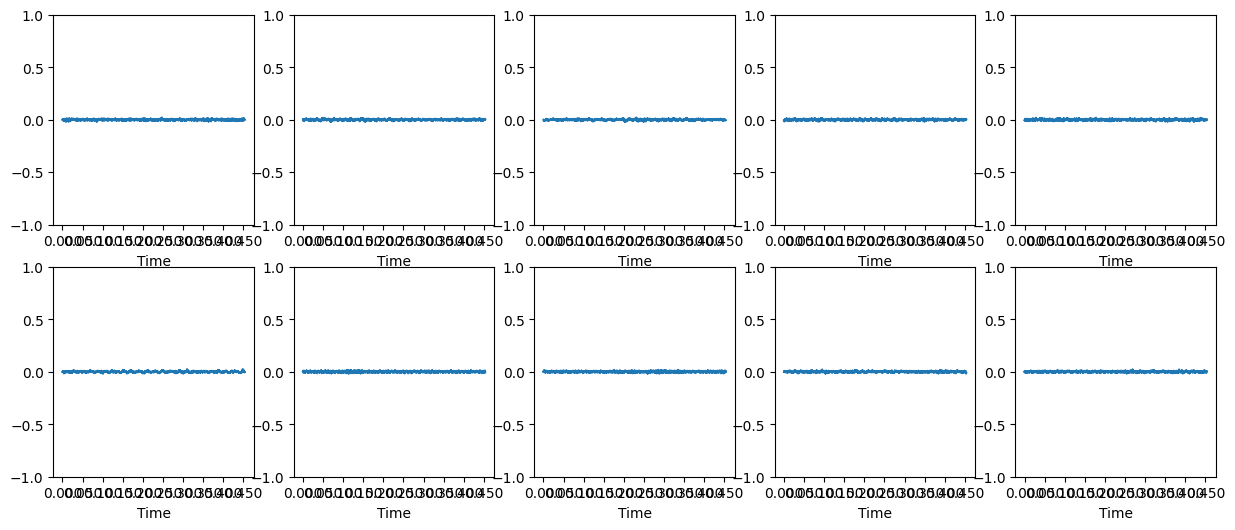

In [31]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

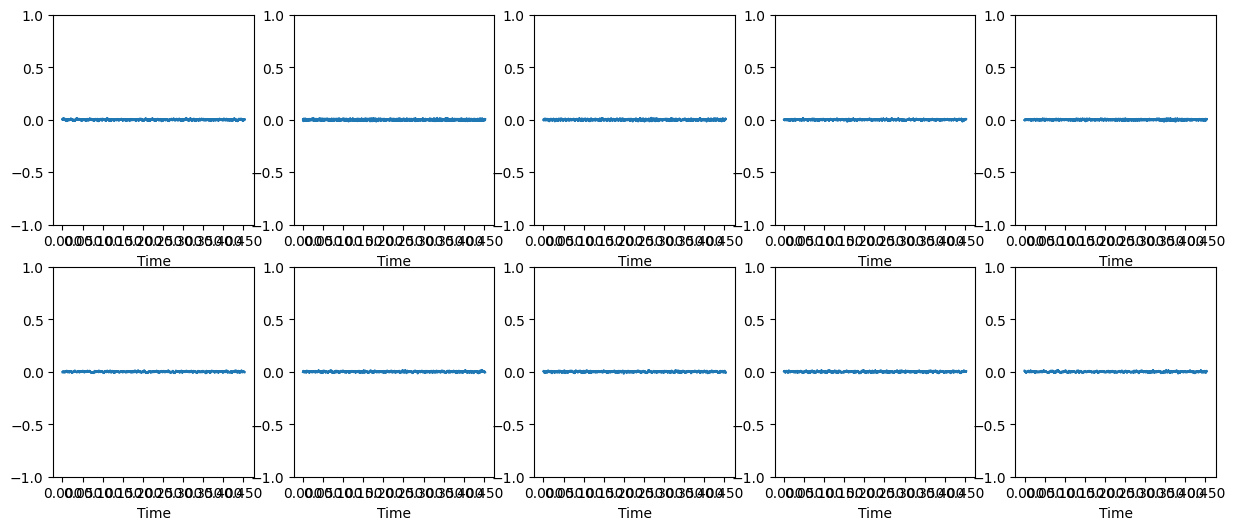

In [32]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [33]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [37]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [35]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [36]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [38]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[3.71093750e-02 1.70665203e+03]
[9.47265625e-02 2.40322037e+03]
[3.75976562e-02 1.41975955e+03]
[5.56640625e-02 2.04212335e+03]


Text(0, 0.5, 'Count')

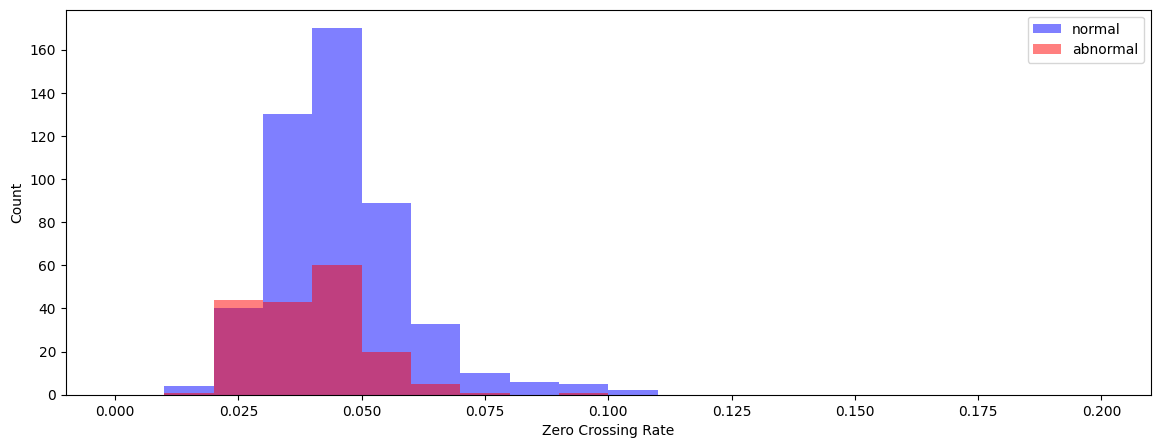

In [39]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

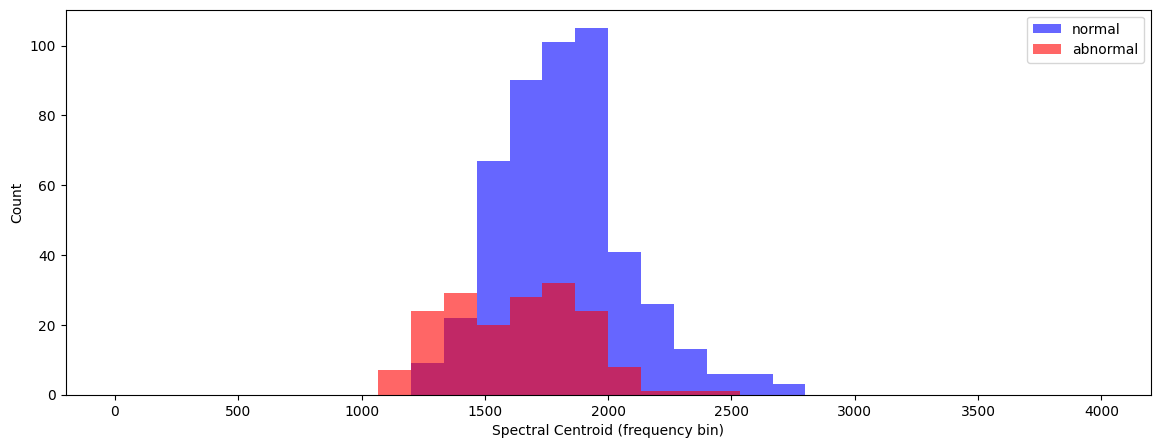

In [40]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [41]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [42]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [43]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [44]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

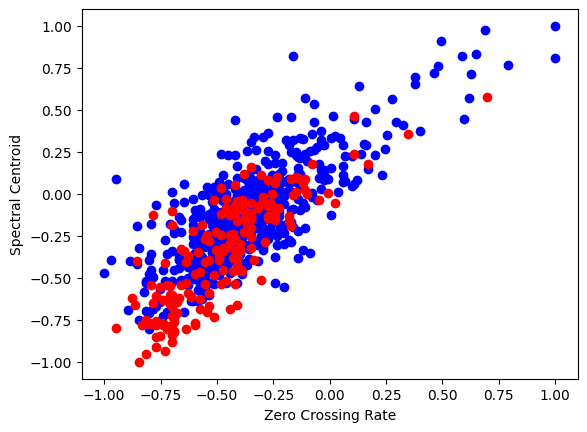

In [45]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [46]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [47]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [48]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [49]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [50]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [51]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [53]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [54]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4889 - loss: 0.6957 - val_accuracy: 0.7229 - val_loss: 0.6659
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6898 - loss: 0.6563 - val_accuracy: 0.7410 - val_loss: 0.6321
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7193 - loss: 0.6375 - val_accuracy: 0.7169 - val_loss: 0.6100
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7437 - loss: 0.6135 - val_accuracy: 0.7169 - val_loss: 0.5957
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7591 - loss: 0.5885 - val_accuracy: 0.7169 - val_loss: 0.5868
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7284 - loss: 0.5875 - val_accuracy: 0.7169 - val_loss: 0.5805
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7173 - loss: 0.5908 - val_accuracy: 0.7169 - val_loss: 0.5763
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7406 - loss: 0.5716 - val_accu

In [56]:
import plotly
import plotly.graph_objs as go

In [57]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [58]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [60]:
file_name = '/content/drive/MyDrive/DST/train/a_00000004_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


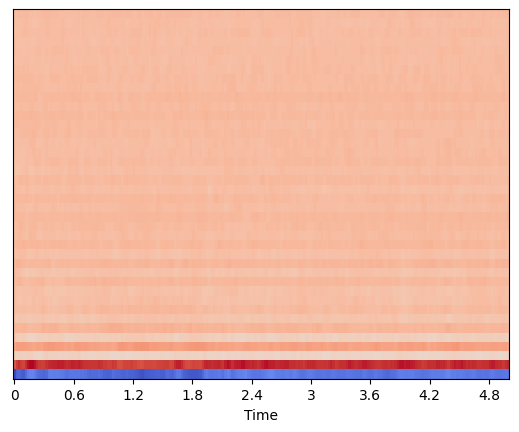

In [61]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

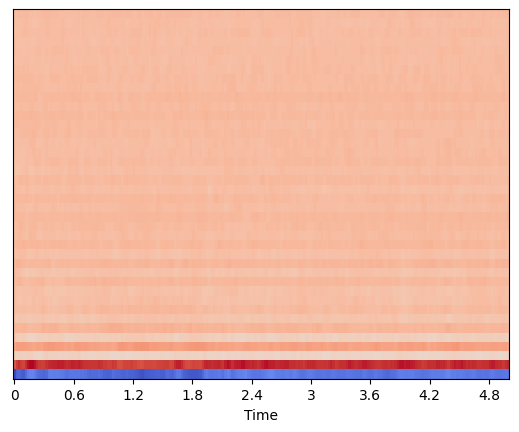

In [62]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [63]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [65]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [66]:
normal_train_features[0].shape

(40, 216)

In [71]:
normal_test = test_data+"/n_*.wav"
abnormal_test = test_data+"/a_*.wav"

normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

In [72]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 40, 216)


In [70]:
feature_test_table = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
print(feature_test_table.shape)

(208, 40, 216, 1)


In [73]:
normal_test = test_data+"/n_*.wav"
abnormal_test = test_data+"/a_*.wav"

In [74]:
normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

In [75]:
feature_test_table = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
print(feature_test_table.shape)

(208, 40, 216, 1)


In [76]:
normal_test = test_data+"/n_*.wav"
abnormal_test = test_data+"/a_*.wav"

normal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_test)
]

abnormal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_test)
]

normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

In [77]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 40, 216)


In [78]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
feature_test_table = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
print(feature_test_table.shape)

(208, 40, 216, 1)


In [79]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [80]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [81]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [82]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [83]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [84]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [85]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [86]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [87]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [88]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [91]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9350 - loss: 0.1606
Epoch 1: val_loss improved from 0.23603 to 0.21982, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9383 - loss: 0.1576 - val_accuracy: 0.9518 - val_loss: 0.2198
Epoch 2/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9381 - loss: 0.1700
Epoch 2: val_loss did not improve from 0.21982
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9394 - loss: 0.1668 - val_accuracy: 0.9337 - val_loss: 0.2377
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9321 - loss: 0.1601
Epoch 3: val_loss did not improve from 0.21982
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9330 - loss: 0.1597 - val_accuracy: 0.9277 - val_loss: 0.2457
Epoch 4/50
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9633 - loss: 0.1368
Epoch 4: val_loss did not improve from 0.21982
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9563 - loss: 0.1458 - val_accura

In [92]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [93]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [94]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [95]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.1040, acc: 0.9729
Validation- loss: 0.1569, acc: 0.9337


In [96]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [97]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[116   3]
 [  8  39]]


In [98]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9355    0.9748    0.9547       119
    abnormal     0.9286    0.8298    0.8764        47

    accuracy                         0.9337       166
   macro avg     0.9320    0.9023    0.9156       166
weighted avg     0.9335    0.9337    0.9326       166



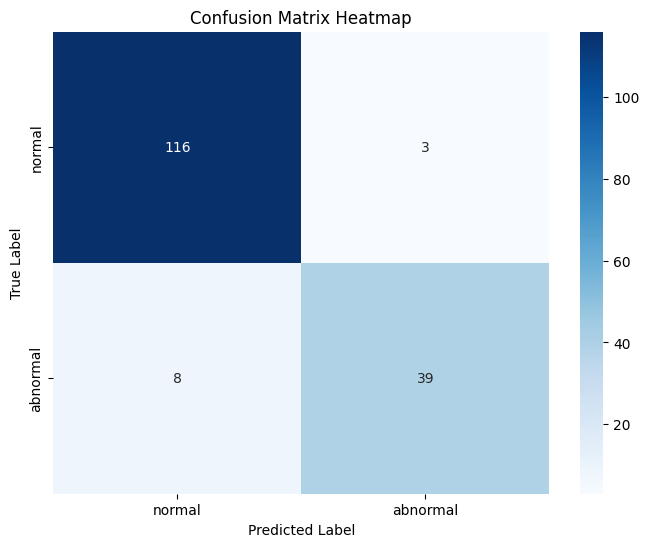

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [100]:
test_data = os.path.join(data_path, "test")

In [101]:
import glob
normal_test = os.path.join(test_data, "n_*.wav")
abnormal_test = os.path.join(test_data, "a_*.wav")

normal_test_signals   = [librosa.load(f)[0] for f in glob.glob(normal_test)]
abnormal_test_signals = [librosa.load(f)[0] for f in glob.glob(abnormal_test)]

In [102]:
normal_test_features   = [extract_features(f) for f in glob.glob(normal_test)]
abnormal_test_features = [extract_features(f) for f in glob.glob(abnormal_test)]

In [103]:
import numpy as np
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
feature_test_table = feature_test_table.reshape(
    feature_test_table.shape[0],
    feature_test_table.shape[1],
    feature_test_table.shape[2],
    1
)
x_test = feature_test_table

In [104]:
from tensorflow.keras.utils import to_categorical
y_test_labels = [0]*len(normal_test_features) + [1]*len(abnormal_test_features)
y_test = to_categorical(y_test_labels)

In [105]:
test_res = model.evaluate(x_test, y_test, verbose=1, return_dict=True)
print(f"Test  - loss: {test_res['loss']:.4f}, acc: {test_res['accuracy']:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9827 - loss: 0.1131
Test  - loss: 0.1104, acc: 0.9760


In [106]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred_cl = np.argmax(y_pred, axis=1)
y_true_cl = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_cl, y_pred_cl)
print(cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[152   2]
 [  3  51]]
